In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn import linear_model

In [4]:
data = genfromtxt('C:\\Users\\Administrator\\python课程资料\\机器学习\\程序\\回归\\longley.csv',delimiter=',')
print(data)

[[     nan      nan      nan      nan      nan      nan      nan      nan]
 [     nan   83.     234.289  235.6    159.     107.608 1947.      60.323]
 [     nan   88.5    259.426  232.5    145.6    108.632 1948.      61.122]
 [     nan   88.2    258.054  368.2    161.6    109.773 1949.      60.171]
 [     nan   89.5    284.599  335.1    165.     110.929 1950.      61.187]
 [     nan   96.2    328.975  209.9    309.9    112.075 1951.      63.221]
 [     nan   98.1    346.999  193.2    359.4    113.27  1952.      63.639]
 [     nan   99.     365.385  187.     354.7    115.094 1953.      64.989]
 [     nan  100.     363.112  357.8    335.     116.219 1954.      63.761]
 [     nan  101.2    397.469  290.4    304.8    117.388 1955.      66.019]
 [     nan  104.6    419.18   282.2    285.7    118.734 1956.      67.857]
 [     nan  108.4    442.769  293.6    279.8    120.445 1957.      68.169]
 [     nan  110.8    444.546  468.1    263.7    121.95  1958.      66.513]
 [     nan  112.6    482.

In [5]:
x_data = data[1:,2:]
y_data = data[1:,1]
print(x_data)
print(y_data)

[[ 234.289  235.6    159.     107.608 1947.      60.323]
 [ 259.426  232.5    145.6    108.632 1948.      61.122]
 [ 258.054  368.2    161.6    109.773 1949.      60.171]
 [ 284.599  335.1    165.     110.929 1950.      61.187]
 [ 328.975  209.9    309.9    112.075 1951.      63.221]
 [ 346.999  193.2    359.4    113.27  1952.      63.639]
 [ 365.385  187.     354.7    115.094 1953.      64.989]
 [ 363.112  357.8    335.     116.219 1954.      63.761]
 [ 397.469  290.4    304.8    117.388 1955.      66.019]
 [ 419.18   282.2    285.7    118.734 1956.      67.857]
 [ 442.769  293.6    279.8    120.445 1957.      68.169]
 [ 444.546  468.1    263.7    121.95  1958.      66.513]
 [ 482.704  381.3    255.2    123.366 1959.      68.655]
 [ 502.601  393.1    251.4    125.368 1960.      69.564]
 [ 518.173  480.6    257.2    127.852 1961.      69.331]
 [ 554.894  400.7    282.7    130.081 1962.      70.551]]
[ 83.   88.5  88.2  89.5  96.2  98.1  99.  100.  101.2 104.6 108.4 110.8
 112.6 114.2 1

In [9]:
#创建模型
#生成50个λ值
alphas_to_test = np.linspace(0.001,1,50)
#创建模型，保存误差值
#Ridge代表岭回归，CV代表交叉验证
#store_cv_values=True保存交叉验证的结果
model = linear_model.RidgeCV(alphas=alphas_to_test,store_cv_values=True)
model.fit(x_data,y_data)

#岭系数λ
#最好的岭系数
print(model.alpha_)
#loss值
#经过交叉验证16个数据集得到16个loss值
#50代表50个岭系数
print(model.cv_values_.shape)

0.40875510204081633
(16, 50)


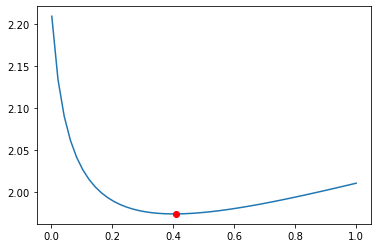

In [11]:
#画图
#岭系数和loss的关系
#cv_values_表示loss值.mean代表求平均值，相当于对16个loss值求均值
#x坐标岭系数，y坐标为相对应的loss平均值
plt.plot(alphas_to_test,model.cv_values_.mean(axis=0))
#最佳岭系数值的位置
plt.plot(model.alpha_,min(model.cv_values_.mean(axis=0)),'ro')
plt.show()

In [16]:
#模型的预测
#使用x_data中的值进行预测→88.11216213
#实际值：88.2
model.predict(x_data[2,np.newaxis])

array([88.11216213])